文件格式转换

In [2]:
import os
import shutil

# Spark输出的根目录路径
root_folder = "output"  # 修改为你的实际路径
# 目标保存CSV文件的目录
target_folder = "csv_files"  # 最终CSV文件保存的位置

# 如果目标文件夹不存在，则创建它
os.makedirs(target_folder, exist_ok=True)

# 遍历output下的所有子文件夹
for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)

    # 确保是文件夹
    if os.path.isdir(folder_path):
        # 查找CSV文件
        for file_name in os.listdir(folder_path):
            if file_name.endswith(".csv"):
                csv_file_path = os.path.join(folder_path, file_name)

                # 定义新的CSV文件名
                new_csv_name = f"{folder_name}"
                new_csv_path = os.path.join(target_folder, new_csv_name)

                # 复制并重命名CSV文件
                shutil.copy(csv_file_path, new_csv_path)
                print(f"Copied and renamed {csv_file_path} to {new_csv_path}")


Copied and renamed output\achievement_ratings.csv\part-00000-24a1c46b-fe71-4efe-b74d-0cd6b45c2135-c000.csv to csv_files\achievement_ratings.csv
Copied and renamed output\category_avg_price.csv\part-00000-06efc87a-1bea-49e4-b081-2037a71a68e6-c000.csv to csv_files\category_avg_price.csv
Copied and renamed output\developer_avg_price.csv\part-00000-702344a3-3eeb-4728-a383-8f738b1d170c-c000.csv to csv_files\developer_avg_price.csv
Copied and renamed output\developer_counts.csv\part-00000-7283350b-0970-4ede-83a9-861bf905386b-c000.csv to csv_files\developer_counts.csv
Copied and renamed output\english_games.csv\part-00000-498a637b-ebe4-4a69-93e4-298bf5109f59-c000.csv to csv_files\english_games.csv
Copied and renamed output\genre_counts.csv\part-00000-fdaab0ce-cf5c-4580-aa85-6b53f56f404d-c000.csv to csv_files\genre_counts.csv
Copied and renamed output\owner_playtime.csv\part-00000-be759276-248b-4b55-8bc4-8689a8525a7b-c000.csv to csv_files\owner_playtime.csv
Copied and renamed output\platform_c

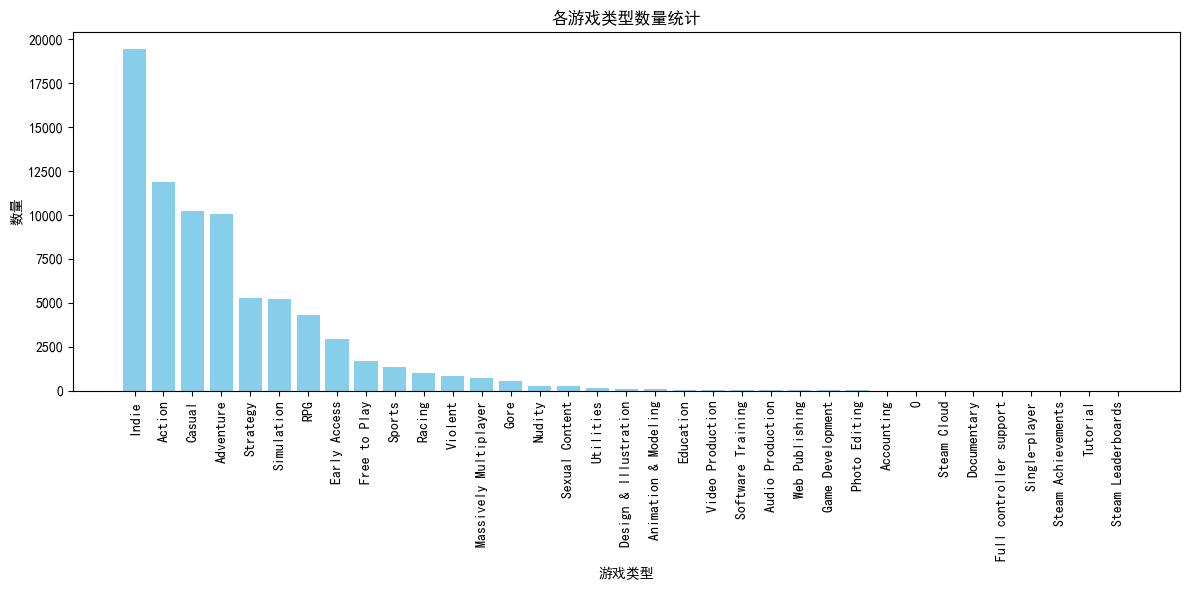

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
file_path = 'csv_files/genre_counts.csv'
df_genre = pd.read_csv(file_path)

# 设置中文字体以避免中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 柱状图
plt.figure(figsize=(12, 6))
plt.bar(df_genre['genre'], df_genre['count'], color='skyblue')
plt.xticks(rotation=90)  # 旋转x轴标签以便显示长名称
plt.xlabel('游戏类型')
plt.ylabel('数量')
plt.title('各游戏类型数量统计')
plt.tight_layout()  # 自动调整子图参数，使之布局紧凑
plt.show()

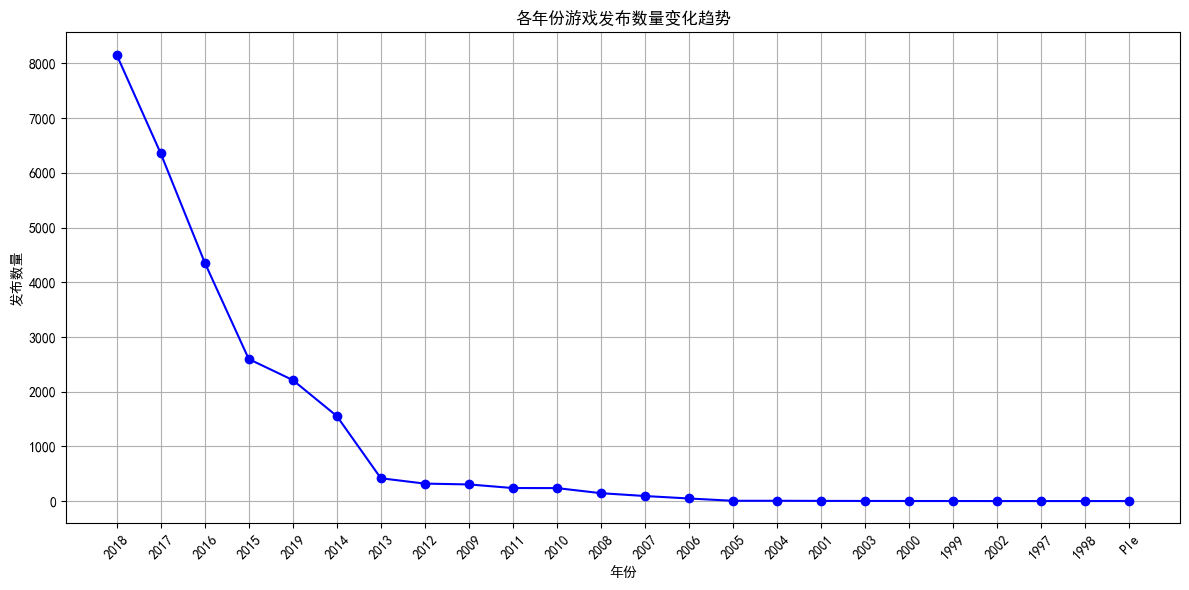

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
file_path = 'csv_files/release_years.csv'
df_year = pd.read_csv(file_path)

# 设置中文字体以避免中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 折线图
plt.figure(figsize=(12, 6))
plt.plot(df_year['year'], df_year['count'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.xlabel('年份')
plt.ylabel('发布数量')
plt.title('各年份游戏发布数量变化趋势')
plt.grid(True)
plt.tight_layout()
plt.show()

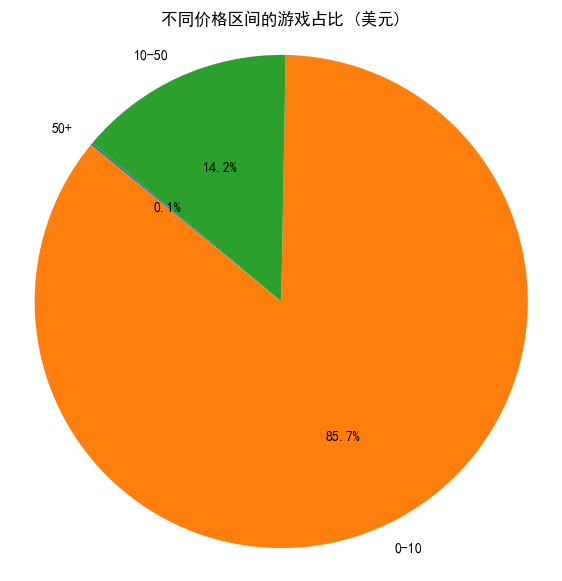

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
file_path = 'csv_files/price_ranges.csv'
df_price = pd.read_csv(file_path)

# 设置中文字体以避免中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 饼图
plt.figure(figsize=(7, 7))
plt.pie(df_price['count'], labels=df_price['price_range'], autopct='%1.1f%%', startangle=140)
plt.title('不同价格区间的游戏占比 (美元)')
plt.axis('equal')  # 确保饼图为圆形
plt.show()

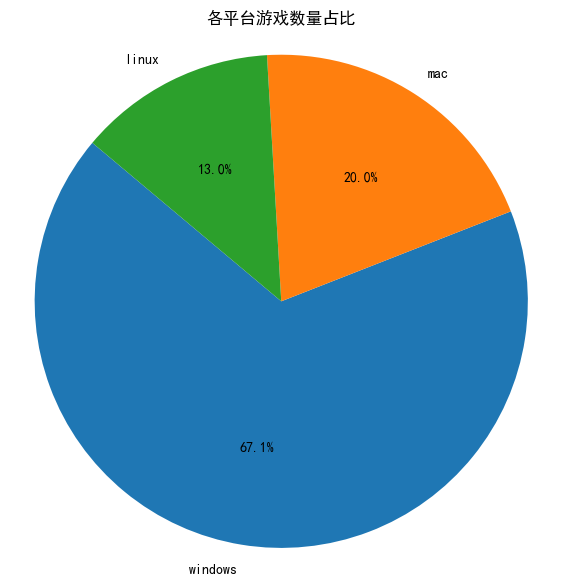

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
file_path = 'csv_files/platform_counts.csv'
df_platform = pd.read_csv(file_path)

# 过滤掉非主流平台的异常条目
main_platforms = ['windows', 'mac', 'linux']
df_filtered = df_platform[df_platform['platform'].isin(main_platforms)]

# 设置中文字体以避免中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 饼图
plt.figure(figsize=(7, 7))
plt.pie(df_filtered['count'], labels=df_filtered['platform'], autopct='%1.1f%%', startangle=140)
plt.title('各平台游戏数量占比')
plt.axis('equal')  # 确保饼图为圆形
plt.show()